<a href="https://colab.research.google.com/github/Scott-Huston/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Scott_Huston_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
# Loading dataset and naming columns

import pandas as pd

column_headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names = column_headers)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [2]:
# Checking for null values
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [3]:
# Changing A16 column to boolean and renaming the column 'Approved'
df['A16'].replace('+',1,inplace = True)
df['A16'].replace('-',0,inplace = True)
df.rename(columns = {'A16': 'Approved'}, inplace = True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [4]:
# Count = 690 for each which matches what UCI says
df.describe()

,A3,A8,A11,A15,Approved
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928
std,4.978163,3.346513,4.86294,5210.102598,0.497318
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,0.000000
50%,2.750000,1.000000,0.00000,5.000000,0.000000
75%,7.207500,2.625000,3.00000,395.500000,1.000000
max,28.000000,28.500000,67.00000,100000.000000,1.000000


In [5]:
# Count = 690 for each which matches what UCI says
df.describe(exclude = 'number')

,A1,A2,A4,A5,A6,A7,A9,A10,A12,A13,A14
count,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171
top,b,?,u,g,c,v,t,f,f,g,00000
freq,468,12,519,519,137,399,361,395,374,625,132


In [6]:
# UCI says:
# 8.  Missing Attribute Values:
#     37 cases (5%) have one or more missing values.  The missing
#     values from particular attributes are:

#     A1:  12
#     A2:  12
#     A4:   6
#     A5:   6
#     A6:   9
#     A7:   9
#     A14: 13

# Looking at those columns
print('A1:',df.A1.value_counts())
print('A2:',df.A2.value_counts())
print('A4:',df.A4.value_counts())
print('A5:',df.A5.value_counts())
print('A6:',df.A6.value_counts())
print('A7:',df.A7.value_counts())
print('A14:',df.A14.value_counts())

A1: b    468
a    210
?     12
Name: A1, dtype: int64
A2: ?        12
22.67     9
20.42     7
19.17     6
23.58     6
25.00     6
20.67     6
24.50     6
18.83     6
22.50     6
23.08     5
23.00     5
33.17     5
27.67     5
27.83     5
23.25     5
23.50     4
24.75     4
26.67     4
27.25     4
20.75     4
41.17     4
34.17     4
24.58     4
28.58     4
22.92     4
22.08     4
26.17     4
25.67     4
25.17     4
         ..
52.42     1
25.92     1
57.83     1
28.08     1
29.75     1
39.33     1
39.00     1
47.83     1
51.92     1
45.17     1
49.50     1
60.08     1
73.42     1
37.17     1
38.17     1
49.83     1
30.33     1
45.83     1
48.50     1
54.33     1
26.00     1
43.00     1
18.00     1
26.83     1
56.42     1
47.33     1
39.83     1
29.92     1
28.33     1
37.42     1
Name: A2, Length: 350, dtype: int64
A4: u    519
y    163
?      6
l      2
Name: A4, dtype: int64
A5: g     519
p     163
?       6
gg      2
Name: A5, dtype: int64
A6: c     137
q      78
w      64
i      59


In [7]:
# Looks like all of the missing data is represented as question marks

import numpy as np

df.replace('?',np.NaN, inplace = True)
df.isnull().sum()
# This matches what UCI says

A1          12
A2          12
A3           0
A4           6
A5           6
A6           9
A7           9
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14         13
A15          0
Approved     0
dtype: int64

In [8]:
# Checking data types
# A1: b, a. 
# A2: continuous. //should be float
# A3: continuous.
# A4: u, y, l, t. 
# A5: g, p, gg.  
# A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
# A7: v, h, bb, j, n, z, dd, ff, o. 
# A8: continuous.
# A9: t, f.
# A10: t, f.
# A11: continuous.
# A12: t, f.
# A13: g, p, s.
# A14: continuous. // should be float
# A15: continuous.
# A16: +,- (class attribute)
df.dtypes

A1           object
A2           object
A3          float64
A4           object
A5           object
A6           object
A7           object
A8          float64
A9           object
A10          object
A11           int64
A12          object
A13          object
A14          object
A15           int64
Approved      int64
dtype: object

In [9]:
# Converting columns to floats
df['A2'] = df['A2'].astype(float)
df['A14'] = df['A14'].astype(float)
df.dtypes

A1           object
A2          float64
A3          float64
A4           object
A5           object
A6           object
A7           object
A8          float64
A9           object
A10          object
A11           int64
A12          object
A13          object
A14         float64
A15           int64
Approved      int64
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


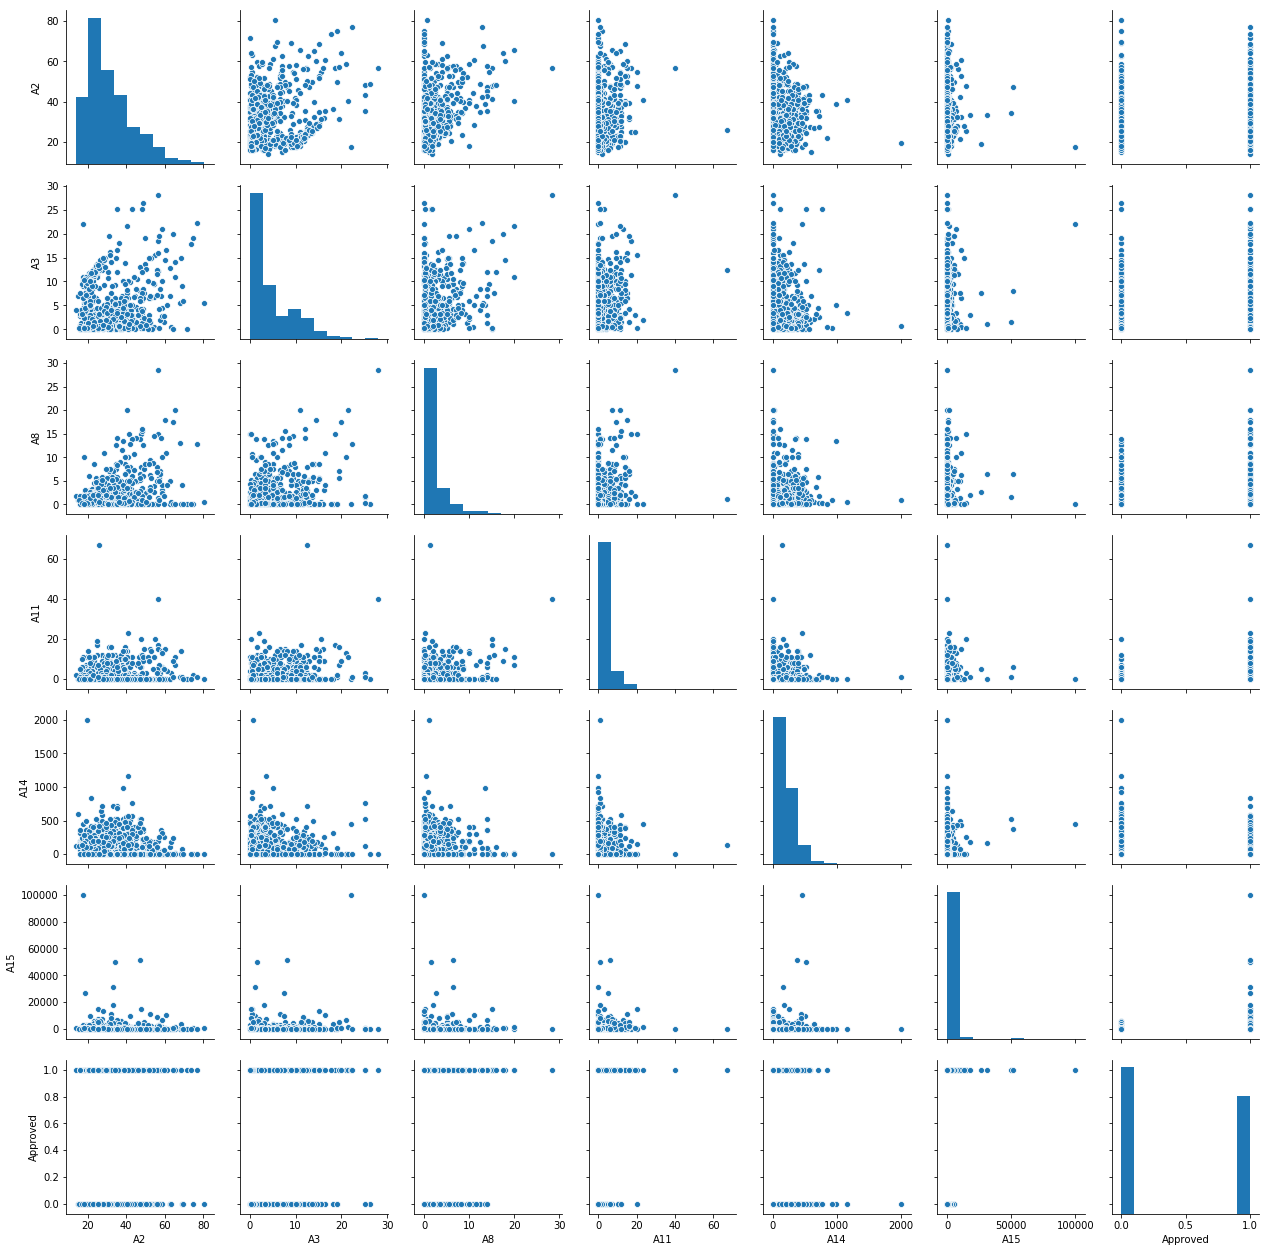

In [10]:
import seaborn as sns

sns.pairplot(df)

In [11]:
df.describe()

,A2,A3,A8,A11,A14,A15,Approved
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


In [12]:
# Splitting the dataframe into approved and rejected data
approved = df[df['Approved'] == 1]
rejected = df[df['Approved'] == 0]
# Checking that it worked correctly
print(rejected.describe())
approved.describe()

               A2          A3          A8  ...          A14          A15  Approved
count  373.000000  383.000000  383.000000  ...   376.000000   383.000000     383.0
mean    29.808231    3.839948    1.257924  ...   199.699468   198.605744       0.0
std     10.919291    4.337662    2.120481  ...   181.564835   671.608839       0.0
min     15.170000    0.000000    0.000000  ...     0.000000     0.000000       0.0
25%     22.000000    0.835000    0.125000  ...   100.000000     0.000000       0.0
50%     27.330000    2.210000    0.415000  ...   167.500000     1.000000       0.0
75%     34.830000    5.000000    1.500000  ...   272.000000    67.000000       0.0
max     80.250000   26.335000   13.875000  ...  2000.000000  5552.000000       0.0

[8 rows x 7 columns]


,A2,A3,A8,A11,A14,A15,Approved
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000,307.0
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935,1.0
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941,0.0
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000,1.0
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000,1.0
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000,1.0
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000,1.0


In [13]:
from scipy import stats
from scipy.stats import ttest_ind

# 2 sample t-test for the A15 variable for approved vs. rejected data
ttest_ind(approved['A15'], rejected['A15'], nan_policy = 'omit')


Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [14]:
# 2 sample t-test for the A3 variable for approved vs. rejected data
ttest_ind(approved['A3'], rejected['A3'], nan_policy = 'omit')

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

In [15]:
# 2 sample t-test for the A2 variable for approved vs. rejected data
ttest_ind(approved['A2'], rejected['A2'], nan_policy = 'omit')

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

In [16]:
# 2 sample t-test for the A14 variable for approved vs. rejected data
ttest_ind(approved['A14'], rejected['A14'], nan_policy = 'omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [0]:
# Creating some contingency tables

A1_ct = pd.crosstab(df['A1'], df['Approved'])
A4_ct = pd.crosstab(df['A4'], df['Approved'])
A5_ct = pd.crosstab(df['A5'], df['Approved'])
A6_ct = pd.crosstab(df['A6'], df['Approved'])

In [18]:
# Chi-squared test for A1 and Approved
chi_squared, p_value, dof, expected = stats.chi2_contingency(A1_ct)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 0.3112832649161995
P-value: 0.5768937883001117
Degrees of Freedom: 1
Expected: 
 [[115.84070796  94.15929204]
 [258.15929204 209.84070796]]


In [19]:
# Chi-squared test for A4 and Approved
chi_squared, p_value, dof, expected = stats.chi2_contingency(A4_ct)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[  1.11403509   0.88596491]
 [289.09210526 229.90789474]
 [ 90.79385965  72.20614035]]


In [20]:
# Chi-squared test for A5 and Approved
chi_squared, p_value, dof, expected = stats.chi2_contingency(A5_ct)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[289.09210526 229.90789474]
 [  1.11403509   0.88596491]
 [ 90.79385965  72.20614035]]


In [21]:
# Chi-squared test for A6 and Approved
chi_squared, p_value, dof, expected = stats.chi2_contingency(A6_ct)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 98.32520342679135
P-value: 3.4999300402715717e-15
Degrees of Freedom: 13
Expected: 
 [[29.97356828 24.02643172]
 [76.04405286 60.95594714]
 [22.75770925 18.24229075]
 [16.65198238 13.34801762]
 [13.87665198 11.12334802]
 [29.4185022  23.5814978 ]
 [32.74889868 26.25110132]
 [ 5.55066079  4.44933921]
 [28.30837004 22.69162996]
 [21.09251101 16.90748899]
 [43.29515419 34.70484581]
 [ 1.66519824  1.33480176]
 [35.52422907 28.47577093]
 [21.09251101 16.90748899]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

I set up a t test to determine if there was a significant difference in the mean of the A3 variable between the cases that had been approved and the cases that had not been approved. My null hypothesis was that there was no true difference between the two population means. My alternate hypothesis was that there was a significant difference between the population means. I tested this with a confidence level of 99%. The result of the test was a t statistic of 5.53, and a  p-value of 4.55e-08. This p-value is significant at the 99% confidence level so I reject the null hypothesis that the means of the A3 variable in the accepted population and the A3 variable in the rejected population are equal. There is very strong evidence that there is a difference in the A3 variable when the case is accepted as compared to when it is not. 

I also set up a t test to determine if there was a significant difference in the mean of the A14 variable between the cases that had been approved and the cases that had not been approved. My null hypothesis was that there was no true difference between the two population means. My alternate hypothesis was that there was a significant difference between the population means. I tested this with a confidence level of 99%. The result of the test was a t statistic of 2.64, and a p-value of 0.00859. This p-value is significant at the 99% confidence level so I reject the null hypothesis that the means of the A14 variable in the accepted population and the A14 variable in the rejected population are equal. There is strong evidence that there is a difference in the A14 variable when the case is accepted as compared to when it is not. 

In addition to the t tests I ran, I also used Chi-squared tests to test if the categorical A1 and A6 variables were independant from whether the application was accepted or not. In both cases, the null hypothesis was that the variables were independant from each other and the alternative hypothesis was that the variables were not independant. I set a confidence level of 99% for both tests.

The test of the A1 variable compared to whether the application was accepted resulted in a p-value of 0.577. I failed to reject the null hypothesis that the variables are independant.

The test of the A6 variable compared to whether the application was accepted resulted in a p-value of 3.5e-15. This p-value is much lower than the 0.01 needed to reject the null hypothesis at my 99% confidence level so I reject the null hypothesis. There is very strong evidence that the A6 variable is not independant of whether the application was accepted.

---------------

The most challenging part of this sprint challenge was applying functions to columns below. I also tried to use a function to fill in multiple columns at the same time by having the function to return multiple values but I couldn't get it to work in time. Of the things I did that were actually specified goals of the sprint challenge, I think figuring out what the null values were represented as was probably the most difficult part.

# **Additional stretch stuff**

In [22]:
# Creating a table of t-test results for the numerical variables

# A1           object
# A2          float64
# A3          float64
# A4           object
# A5           object
# A6           object
# A7           object
# A8          float64
# A9           object
# A10          object
# A11           int64
# A12          object
# A13          object
# A14         float64
# A15           int64
# Approved      int64

# Only keeping numerical values other than Approved
ttest_results = df.filter(['A2','A3','A8','A11','A14','A15'])

ttest_results = ttest_results.T
ttest_results.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689
A2,30.83,58.67,24.5,27.83,20.170,32.08,33.17,22.920,54.42,42.500,22.080,29.920,38.25,48.08,45.83,36.670,28.250,23.250,21.830,19.170,25.00,23.250,47.750,27.420,41.17,15.830,47.000,56.58,57.42,42.08,29.25,42.00,49.500,36.750,22.580,27.83,27.250,23.00,27.750,54.580,...,48.08,15.830,22.500,21.5,23.580,21.08,25.67,38.920,15.750,28.58,22.250,29.830,23.500,32.08,31.08,31.83,21.75,17.92,30.330,51.83,47.170,25.830,50.250,29.5,37.33,41.580,30.580,19.42,17.92,20.08,19.50,27.83,17.080,36.420,40.58,21.080,22.67,25.25,17.920,35.000
A3,0.00,4.46,0.5,1.54,5.625,4.00,1.04,11.585,0.50,4.915,0.830,1.835,6.00,6.04,10.50,4.415,0.875,5.875,0.250,8.585,11.25,1.000,8.000,14.500,6.50,0.585,13.000,18.50,8.50,1.04,14.79,9.79,7.585,5.125,10.750,1.50,1.585,11.75,0.585,9.415,...,3.75,7.625,0.415,11.5,0.830,5.00,3.25,1.665,0.375,3.75,9.000,3.500,1.500,4.00,1.50,0.04,11.75,0.54,0.500,2.04,5.835,12.835,0.835,2.0,2.50,1.040,10.665,7.25,10.21,1.25,0.29,1.00,3.290,0.750,3.29,10.085,0.75,13.50,0.205,3.375
A8,1.25,3.04,1.5,3.75,1.710,2.50,6.50,0.040,3.96,3.165,2.165,4.335,1.00,0.04,5.00,0.250,0.960,3.170,0.665,0.750,2.50,0.835,7.875,3.085,0.50,1.500,5.165,15.00,7.00,5.00,5.04,7.96,7.585,5.000,0.415,2.00,1.835,0.50,0.250,14.415,...,1.00,0.125,0.335,0.5,0.415,0.00,2.29,0.250,1.000,0.25,0.085,0.165,0.875,1.50,0.04,0.04,0.25,1.75,0.085,1.50,5.500,0.500,0.500,2.0,0.21,0.665,0.085,0.04,0.00,0.00,0.29,3.00,0.335,0.585,3.50,1.250,2.00,2.00,0.040,8.290
A11,1.00,6.00,0.0,5.00,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.00,7.00,10.000,3.000,10.000,0.000,7.000,17.00,0.000,6.000,1.000,3.00,2.000,9.000,17.00,3.00,6.00,5.00,8.00,15.000,0.000,5.000,11.00,12.000,2.00,2.000,11.000,...,0.00,1.000,0.000,0.0,1.000,0.00,1.00,0.000,0.000,1.00,0.000,0.000,0.000,0.00,0.00,0.00,0.00,1.00,0.000,0.00,0.000,0.000,0.000,0.0,0.00,0.000,12.000,1.00,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,2.00,1.00,0.000,0.000
A14,202.00,43.00,280.0,100.00,120.000,360.00,164.00,80.000,180.00,52.000,128.000,260.000,0.00,0.00,0.00,320.000,396.000,120.000,0.000,96.000,200.00,300.000,0.000,120.000,145.00,100.000,0.000,0.00,0.00,500.00,168.00,0.00,0.000,0.000,0.000,434.00,583.000,300.00,260.000,30.000,...,100.00,0.000,144.000,100.0,200.000,0.00,416.00,0.000,120.000,40.00,0.000,216.000,160.000,120.00,160.00,0.00,180.00,80.00,252.000,120.00,465.000,0.000,240.000,256.0,260.00,240.000,129.000,100.00,0.00,0.00,280.00,176.00,140.000,240.000,400.00,260.000,200.00,200.00,280.000,0.000


In [23]:
# Clearing columns
ttest_results = ttest_results.filter([])
ttest_results.head()

""
A2
A3
A8
A11
A14


In [44]:
# Filling in values

# Defining functions for whether or not to reject the null hypothesis at various confidence levels
def Confidence_90 (pvalue):
  if pvalue<.1:
    return 'Reject null'
  else:
    return 'Fail to reject'
def Confidence_95 (pvalue):
  if pvalue<.05:
    return 'Reject null'
  else:
    return 'Fail to reject'
def Confidence_99 (pvalue):
  if pvalue<.01:
    return 'Reject null'
  else:
    return 'Fail to reject'
  
# Getting t statistic and p-values
ttest_results['t-statistic'] = ttest_ind(approved[ttest_results.index], rejected[ttest_results.index], nan_policy = 'omit')[0]
ttest_results['P-value'] = ttest_ind(approved[ttest_results.index], rejected[ttest_results.index], nan_policy = 'omit')[1]

# Applying confidence level functions
ttest_results['Confidence_90'] = ttest_results['P-value'].apply(Confidence_90)
ttest_results['Confidence_95'] = ttest_results['P-value'].apply(Confidence_95)
ttest_results['Confidence_99'] = ttest_results['P-value'].apply(Confidence_99)

ttest_results.head()

,Statistic,P-value,Confidence_90,Confidence_95,Confidence_99,t-statistic
A2,4.292216,2.027664e-05,Reject null,Reject null,Reject null,4.292216
A3,5.529983,4.551681e-08,Reject null,Reject null,Reject null,5.529983
A8,8.935820,3.671054e-18,Reject null,Reject null,Reject null,8.935820
A11,11.667004,7.957719e-29,Reject null,Reject null,Reject null,11.667004
A14,-2.635825,8.586135e-03,Reject null,Reject null,Reject null,-2.635825


In [25]:
# Creating table for categorical variables

chi_squared_results = df.select_dtypes(include=['object'])
chi_squared_results.head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,b,u,g,w,v,t,t,f,g
1,a,u,g,q,h,t,t,f,g
2,a,u,g,q,h,t,f,f,g
3,b,u,g,w,v,t,t,t,g
4,b,u,g,w,v,t,f,f,s


In [26]:
# Getting blank df with categorical variable names as index values
chi_squared_results = chi_squared_results.T
chi_squared_results = chi_squared_results.filter([])
chi_squared_results

""
A1
A4
A5
A6
A7
A9
A10
A12
A13


In [27]:
# Making the variable names a column in the df
chi_squared_results['variable_name']=chi_squared_results.index
chi_squared_results

,variable_name
A1,A1
A4,A4
A5,A5
A6,A6
A7,A7
A9,A9
A10,A10
A12,A12
A13,A13


In [43]:
# Defining functions to return chi-squared results

def chi2(variable_name):
  ct = pd.crosstab(df[variable_name], df['Approved'])
  chi_squared, p_value, dof, expected = stats.chi2_contingency(ct)
  return chi_squared
def p_value (variable_name):
  ct = pd.crosstab(df[variable_name], df['Approved'])
  chi_squared, p_value, dof, expected = stats.chi2_contingency(ct)
  return p_value
def dof(variable_name):
  ct = pd.crosstab(df[variable_name], df['Approved'])
  chi_squared, p_value, dof, expected = stats.chi2_contingency(ct)
  return dof

# Applying chi-squared functions to the df 
chi_squared_results['chi2_stat'] = chi_squared_results.variable_name.apply(chi2)
chi_squared_results['p_value'] = chi_squared_results.variable_name.apply(p_value)
chi_squared_results['dof'] = chi_squared_results.variable_name.apply(dof)

# Applying functions to say if the null hypothesis would be rejected at a certain confidence level
chi_squared_results['Confidence_90'] = chi_squared_results['p_value'].apply(Confidence_90)
chi_squared_results['Confidence_95'] = chi_squared_results['p_value'].apply(Confidence_95)
chi_squared_results['Confidence_99'] = chi_squared_results['p_value'].apply(Confidence_99)

chi_squared_results.head()

,variable_name,chi2_stat,p_value,dof,Confidence_90,Confidence_95,Confidence_99
A1,A1,0.311283,5.768938e-01,1,Fail to reject,Fail to reject,Fail to reject
A4,A4,26.234075,2.010680e-06,2,Reject,Reject,Reject
A5,A5,26.234075,2.010680e-06,2,Reject,Reject,Reject
A6,A6,98.325203,3.499930e-15,13,Reject,Reject,Reject
A7,A7,45.034207,3.625453e-07,8,Reject,Reject,Reject
